In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

60000
torch.Size([1, 28, 28]) 5


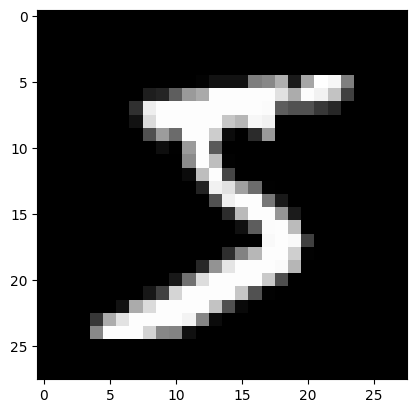

In [8]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [9]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

In [10]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [11]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 1)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


model = Model(28 * 28 * 1, 1024)

In [14]:
from torch.optim import SGD

lr = 0.001
model = model.to('cpu')

optimizer = SGD(model.parameters(), lr=lr)

In [16]:
n_epochs = 100

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cpu'), labels.to('cpu')

    preds = model(inputs)
    loss = (preds[:, 0] - labels).pow(2).mean()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 4646.996044874191
Epoch   1 | Loss: 2547.276556491852
Epoch   2 | Loss: 1836.7298486828804
Epoch   3 | Loss: 1439.8137925863266
Epoch   4 | Loss: 1205.7616469562054
Epoch   5 | Loss: 1055.6762568056583
Epoch   6 | Loss: 955.6152095794678
Epoch   7 | Loss: 879.0628028512001
Epoch   8 | Loss: 821.8719180524349
Epoch   9 | Loss: 771.7237174808979
Epoch  10 | Loss: 729.2049168646336
Epoch  11 | Loss: 694.6148589253426
Epoch  12 | Loss: 662.3749514520168
Epoch  13 | Loss: 633.9831789582968
Epoch  14 | Loss: 606.5917916595936
Epoch  15 | Loss: 583.5622809976339
Epoch  16 | Loss: 563.3025965988636
Epoch  17 | Loss: 542.9276519864798
Epoch  18 | Loss: 523.0020904690027
Epoch  19 | Loss: 505.83128713071346
Epoch  20 | Loss: 490.2562045156956
Epoch  21 | Loss: 475.8799902498722
Epoch  22 | Loss: 461.55247417092323
Epoch  23 | Loss: 445.20932791382074
Epoch  24 | Loss: 435.78239476680756
Epoch  25 | Loss: 420.1281496435404
Epoch  26 | Loss: 409.2833966612816
Epoch  27 | Loss: 39

In [18]:
idx = 0

x = trainset[idx][0][None]  # (1, 1, 28, 28)
x = x.to('cpu')

print(model(x))
print(trainset[idx][1])

tensor([[4.8005]], grad_fn=<ReluBackward0>)
5


In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

batch_size = 256  
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False 
)

In [21]:
class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)  

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x) 

    return x

In [22]:
model = Model(28 * 28 * 1, 1024)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [23]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss

# 학습률 설정
lr = 0.001
# 옵티마이저 설정
optimizer = SGD(model.parameters(), lr=lr)

# 손실 함수 설정 (CrossEntropyLoss)
criterion = CrossEntropyLoss()

In [24]:
import numpy as np

# 정확도 측정 함수
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  model.eval()  # 평가 모드로 설정
  with torch.no_grad():  # 그래디언트 계산 비활성화
    for data in dataloader:
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      preds = model(inputs)
      preds = torch.argmax(preds, dim=-1)

      cnt += labels.shape[0]
      acc += (labels == preds).sum().item()

  return acc / cnt

# 정확도 시각화 함수
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.figure(figsize=(10, 6))
  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Training and Test Accuracy over Epochs')
  plt.legend()
  plt.grid(True)
  plt.show()

In [25]:
# 학습 파라미터 설정
n_epochs = 100
batch_size = 256

# 학습 결과 저장용 리스트
train_accs = []
test_accs = []

# 학습 시작
for epoch in range(n_epochs):
  # 학습 모드
  model.train()
  total_loss = 0.0
  
  for data in trainloader:
    # 그래디언트 초기화
    optimizer.zero_grad()
    
    # 데이터 준비
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    # 순전파
    outputs = model(inputs)
    
    # 손실 계산
    loss = criterion(outputs, labels)
    
    # 역전파 및 가중치 업데이트
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  # 매 에폭마다 정확도 측정
  train_acc = accuracy(model, trainloader)
  test_acc = accuracy(model, testloader)
  
  # 정확도 저장
  train_accs.append(train_acc)
  test_accs.append(test_acc)
  
  # 진행 상황 출력
  print(f"Epoch {epoch+1:3d}/{n_epochs} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# 학습 완료 메시지
print("학습 완료!")

Epoch   1/100 | Loss: 2127.4391 | Train Acc: 0.5423 | Test Acc: 0.5544
Epoch   2/100 | Loss: 2051.9698 | Train Acc: 0.6602 | Test Acc: 0.6712
Epoch   3/100 | Loss: 1929.4405 | Train Acc: 0.7023 | Test Acc: 0.7073
Epoch   4/100 | Loss: 1721.5163 | Train Acc: 0.7321 | Test Acc: 0.7366
Epoch   5/100 | Loss: 1426.4911 | Train Acc: 0.7600 | Test Acc: 0.7688
Epoch   6/100 | Loss: 1126.6596 | Train Acc: 0.7911 | Test Acc: 0.7987
Epoch   7/100 | Loss: 901.6705 | Train Acc: 0.8146 | Test Acc: 0.8193
Epoch   8/100 | Loss: 753.2650 | Train Acc: 0.8322 | Test Acc: 0.8361
Epoch   9/100 | Loss: 654.8284 | Train Acc: 0.8444 | Test Acc: 0.8505
Epoch  10/100 | Loss: 586.2969 | Train Acc: 0.8538 | Test Acc: 0.8596
Epoch  11/100 | Loss: 536.2395 | Train Acc: 0.8623 | Test Acc: 0.8680
Epoch  12/100 | Loss: 498.4163 | Train Acc: 0.8679 | Test Acc: 0.8718
Epoch  13/100 | Loss: 468.5648 | Train Acc: 0.8741 | Test Acc: 0.8796
Epoch  14/100 | Loss: 444.6108 | Train Acc: 0.8783 | Test Acc: 0.8834
Epoch  15/100 

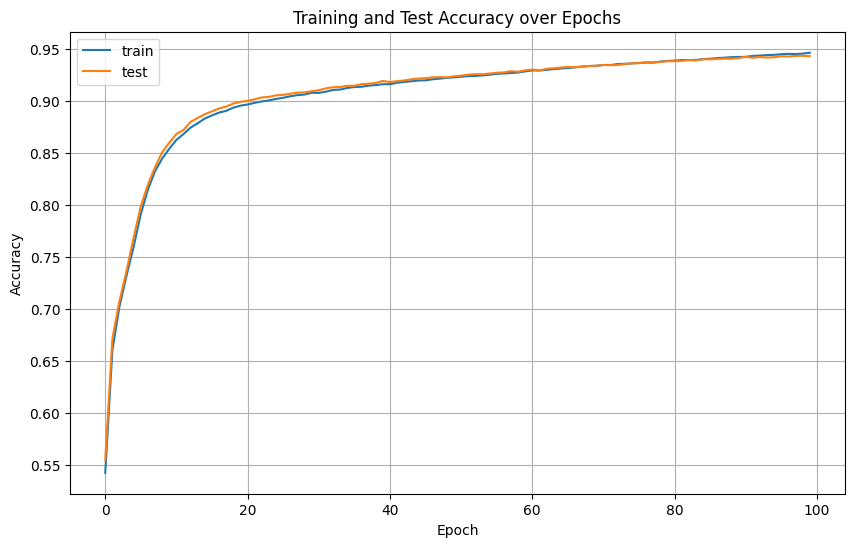

In [26]:
# 정확도 시각화
plot_acc(train_accs, test_accs)